49
[0.49992438 0.42648215]
[0.48691566 0.42326917]
[0.47998351 0.45640474]
[0.48795983 0.45095447]
[0.46608388 0.43145624]
[0.45226795 0.41696098]
[0.44670946 0.41518588]
[0.46394702 0.41351012]
[0.42390677 0.34313588]
[0.46919553 0.45749082]
[0.45951175 0.43192641]
[0.46023359 0.41752724]
[0.45512894 0.4273665 ]
[0.44923674 0.42257962]
[0.46197547 0.42930336]
[0.4711854  0.46308412]
[0.48671408 0.364681  ]
[0.4593865  0.45954566]
[0.27578818 0.01851852]
[0.44631835 0.42538127]
[0.44540102 0.34706104]
[0.44235498 0.37527611]
[0.45680709 0.39700477]
[0.46950099 0.44261065]
[0.44497239 0.44739399]
[0.44892273 0.36999441]
[0.44808829 0.42862027]
[0.4182598  0.36940306]
[0.47417926 0.46329319]
[0.44199492 0.45197952]
[0.45018541 0.42836455]
[0.46726016 0.41954941]
[0.47631696 0.42805426]
[0.46342534 0.45762801]
[0.43741298 0.28372814]
[0.42401828 0.33637468]
[0.45715229 0.4355169 ]
[0.47338978 0.44534357]
[0.39034414 0.04438122]
[0.47885767 0.46615609]
[0.49410001 0.50252798]
[0.46478964 0

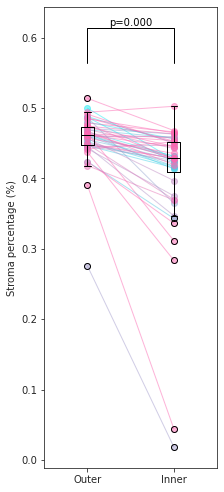

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 10 12:12:21 2020

@author: whitma01
"""


import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# sns.set(style="whitegrid")
sns.set_style("ticks")

colors = [(29/256.0, 236/256.0, 244/256.0),(253/256.0, 105/256.0, 179/256.0)]
cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name, colors, N=64)


percentage_data = genfromtxt('results.csv', delimiter=',')


fig = plt.figure(figsize=(3, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

print(data.shape[0])

for n in range(0, percentage_data.shape[0]):
    print(percentage_data[n,2:4]) 
    df=pd.DataFrame({'x': range(0,2), 'y': percentage_data[n,2:4]})
    ax.plot( 'x', 'y', '', data=df, marker='o', color=newcmp(n/30), linewidth=1, alpha=0.5)

print(percentage_data[1:,2])
print(percentage_data[1:,3])

data_to_plot = [percentage_data[1:,2], percentage_data[1:,3]]
positions = [0,1]
c = "black"
ax.boxplot(data_to_plot, positions=positions,
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )


#ax.set_title('stroma percentages')
ax.set_xticks([0,1])
ax.set_xticklabels(['Outer','Inner'])
#plt.xlabel('Distance from tumor (um)')
plt.ylabel('Stroma percentage (%)')


r, p = stats.ttest_rel(data[1:,2], data[1:,3])
print(p)
x1, x2 = 0, 1 
y, h, col = percentage_data[1:,2].max() + 0.05, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], '', lw=1, c=col)
plt.text((x1+x2)*.5, y+h, "p={:.3f}".format(p), ha='center', va='bottom', color=col)

plt.savefig("stroma_percentage.png", bbox_inches = 'tight')
